#  This notebook is for testing and integrating PASTIS_Modes_E2E.py with the current develop branch

In [1]:
import os
import time
import functools
from shutil import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
import astropy.units as u
import hcipy as hc


os.chdir('/Users/asahoo/repos/PASTIS/') 
from pastis.config import CONFIG_PASTIS 
from pastis.e2e_simulators.luvoir_imaging import LuvoirA_APLC 
import pastis.util as util  
import astropy.table

In [2]:
print(' Loading basic parameters for this specific telescope \n')

### Parameters
design = CONFIG_PASTIS.get('LUVOIR', 'coronagraph_design') #c

# System parameters
root_dir = CONFIG_PASTIS.get('local', 'local_data_path') #c
output_dir = CONFIG_PASTIS.get('local', 'output_data_folder') #needs to be added to config_ini
coronagraph_design = 'small' #c user provides
overall_dir = output_dir + 'luvoirA-'+ coronagraph_design #c
resDir = os.path.join(overall_dir, 'matrix_numerical')

# Moving parts parameters
analysis_name = 'LUVOIRA_APLC_' + design
max_LO = CONFIG_PASTIS.getint('calibration', 'max_LO')
max_MID = CONFIG_PASTIS.getint('calibration', 'max_MID')
max_HI = CONFIG_PASTIS.getint('calibration', 'max_HI')
num_DM_act = CONFIG_PASTIS.getint('calibration', 'num_DM_act')

# General telescope parameters
nb_seg = CONFIG_PASTIS.getint('LUVOIR', 'nb_subapertures')
wvln = CONFIG_PASTIS.getfloat('LUVOIR', 'lambda') * 1e-9  # m
diam = CONFIG_PASTIS.getfloat('LUVOIR', 'diameter')  # m
nm_aber = CONFIG_PASTIS.getfloat('calibration', 'single_aberration') * 1e-9   # m

# Image system parameters
im_lamD = CONFIG_PASTIS.getfloat('numerical', 'im_size_lamD_hcipy')  # image size in lambda/D
sampling = CONFIG_PASTIS.getfloat('numerical', 'sampling')

 Loading basic parameters for this specific telescope 



In [3]:
# Print some of the defined parameters
print('LUVOIR apodizer design: {}'.format(design))
print()
print('Wavelength: {} m'.format(wvln))
print('Telescope diameter: {} m'.format(diam))
print('Number of segments: {}'.format(nb_seg))
print()
print('Image size: {} lambda/D'.format(im_lamD))
print('Sampling: {} px per lambda/D'.format(sampling))

LUVOIR apodizer design: small

Wavelength: 5.000000000000001e-07 m
Telescope diameter: 15.0 m
Number of segments: 120

Image size: 30.0 lambda/D
Sampling: 4.0 px per lambda/D


In [4]:
optics_input = CONFIG_PASTIS.get('LUVOIR', 'optics_path')
datadir = optics_input
luvoir = LuvoirA_APLC(optics_input, design, sampling)
nb_seg = CONFIG_PASTIS.getint('LUVOIR', 'nb_subapertures')
wvln = CONFIG_PASTIS.getfloat('LUVOIR', 'lambda') * 1e-9  # m
diam = CONFIG_PASTIS.getfloat('LUVOIR', 'diameter')  # m
nm_aber = CONFIG_PASTIS.getfloat('calibration', 'single_aberration') * 1e-9   # m
eunit = nm_aber
nm = eunit
im_lamD = CONFIG_PASTIS.getfloat('numerical', 'im_size_lamD_hcipy')  # image size in lambda/D
sampling = CONFIG_PASTIS.getfloat('numerical', 'sampling')
luvoir = LuvoirA_APLC(optics_input, design, sampling)
npup = np.int(np.sqrt(luvoir.pupil_grid.x.shape[0]))
nimg = np.int(np.sqrt(luvoir.focal_det.x.shape[0]))

/opt/miniconda3/envs/pastis_global/lib/python3.7/site-packages/hcipy/field/cartesian_grid.py:74: UserWarning: No automatic weights could be calculated for this grid.
  self.weights *= np.abs(scale)**self.ndim


In [5]:
savedpath = overall_dir
filename_matrix = 'EFIELD_Re_matrix_num_LO_' + str(max_LO) +'.fits'
G_LO_real = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix = 'EFIELD_Im_matrix_num_LO_' + str(max_LO) +'.fits'
G_LO_imag = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix =  'EFIELD_Re_matrix_num_MID_' + str(max_MID) +'.fits'
G_MID_real = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix =  'EFIELD_Im_matrix_num_MID_' + str(max_MID) +'.fits'
G_MID_imag = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix =  'EFIELD_Re_matrix_num_HI_' + str(max_HI) +'.fits'
G_HI_real = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix =  'EFIELD_Im_matrix_num_HI_' + str(max_HI) +'.fits'
G_HI_imag = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix = 'EFIELD_LOWFS_Re_matrix_num_LO_' + str(max_LO) +'.fits'
G_LOWFS_real = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix = 'EFIELD_LOWFS_Im_matrix_num_LO_' + str(max_LO) +'.fits'
G_LOWFS_imag = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix = 'EFIELD_OBWFS_Re_matrix_num_MID_' + str(max_MID) +'.fits'
G_OBWFS_real = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))
filename_matrix = 'EFIELD_OBWFS_Im_matrix_num_MID_' + str(max_MID) +'.fits'
G_OBWFS_imag = fits.getdata(os.path.join(savedpath, 'matrix_numerical', filename_matrix))

In [6]:
luvoir.create_global_zernike_mirror(max_LO)
luvoir.create_segmented_mirror(max_MID)
luvoir.create_ripple_mirror(max_HI)
luvoir.create_continuous_deformable_mirror(num_DM_act)

In [7]:
n_LO = luvoir.zernike_mirror.num_actuators #c
n_MID = luvoir.sm.num_actuators 
n_HI = luvoir.ripple_mirror.num_actuators #c
n_DM = luvoir.dm.num_actuators

In [8]:
z_pup_downsample = CONFIG_PASTIS.getfloat('numerical', 'z_pup_downsample')
N_pup_z = np.int(luvoir.pupil_grid.shape[0] / z_pup_downsample)
grid_zernike = hc.field.make_pupil_grid(N_pup_z, diameter=luvoir.diam)

In [ ]:
#dh_outer = hc.circular_aperture(2 * luvoir.apod_dict[coronagraph_design]['owa'] * luvoir.lam_over_d)(luvoir.focal_det) #c
#dh_inner = hc.circular_aperture(2 * luvoir.apod_dict[coronagraph_design]['iwa'] * luvoir.lam_over_d)(luvoir.focal_det) #c
#dh_mask = (dh_outer - dh_inner).astype('bool')

In [9]:
LO_modes = np.zeros(n_LO)
MID_modes = np.zeros(n_MID)
HI_modes = np.zeros(n_HI)
DM_modes = np.zeros(n_DM)

In [10]:
luvoir.zernike_mirror.actuators = LO_modes #c
luvoir.sm.actuators = MID_modes
luvoir.ripple_mirror.actuators = HI_modes #c
luvoir.dm.actuators = DM_modes

In [12]:
unaberrated_coro_psf, ref = luvoir.calc_psf(ref=True, display_intermediate=False, return_intermediate=None, norm_one_photon=False)

In [13]:
norm = np.max(ref)
dh_intensity = (unaberrated_coro_psf / norm) * luvoir.dh_mask
contrast_floor = np.mean(dh_intensity[np.where(luvoir.dh_mask != 0)])
print('contrast floor: {}'.format(contrast_floor))

contrast floor: 4.237636070056564e-11


In [15]:
nonaberrated_coro_psf, ref,inter_ref = luvoir.calc_psf(ref=True, display_intermediate=False, return_intermediate='efield')
Efield_ref = nonaberrated_coro_psf.electric_field

In [16]:
mat_LO = np.zeros([n_LO-1, n_LO-1])
for i in range(1, n_LO):
    for j in range(1, n_LO):
        tmpI = (G_LO_real[i]+1j*G_LO_imag[i] - Efield_ref)
        tmpJ = (G_LO_real[j]+1j*G_LO_imag[j] - Efield_ref)
        test = np.real(tmpI*np.conj(tmpJ))
        luvoir.dh_test = (test / norm) * luvoir.dh_mask
        contrast = np.mean(luvoir.dh_test[np.where(luvoir.dh_mask != 0)])
        mat_LO[i-1, j-1] = contrast

In [17]:
mat_MID = np.zeros([n_MID, n_MID])
for i in range(0, n_MID):
    for j in range(0, n_MID):
        tmpI = G_MID_real[i]+1j*G_MID_imag[i] - Efield_ref
        tmpJ = G_MID_real[j]+1j*G_MID_imag[j] - Efield_ref
        test = np.real(tmpI*np.conj(tmpJ))
        luvoir.dh_test = (test / norm) * luvoir.dh_mask
        contrast = np.mean(luvoir.dh_test[np.where(luvoir.dh_mask != 0)])
        mat_MID[i, j] = contrast

In [18]:
mat_HI = np.zeros([n_HI, n_HI])
for i in range(0, n_HI):
    for j in range(0, n_HI):
        tmpI = G_HI_real[i]+1j*G_HI_imag[i] - Efield_ref
        tmpJ = G_HI_real[j]+1j*G_HI_imag[j] - Efield_ref
        test = np.real(tmpI*np.conj(tmpJ))
        luvoir.dh_test = (test / norm) * luvoir.dh_mask
        contrast = np.mean(luvoir.dh_test[np.where(luvoir.dh_mask != 0)])
        mat_HI[i, j] = contrast


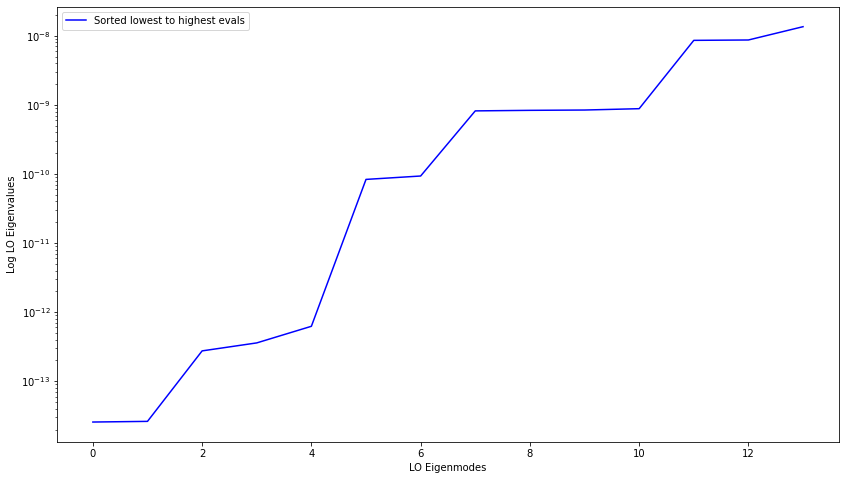

In [19]:
# Figures with eigenvalues
figures_path = overall_dir + '/figures'
os.makedirs(figures_path, exist_ok=True)
evalsLO, evecsLO = np.linalg.eig(mat_LO)
sorted_evalsLO = np.sort(evalsLO)
sorted_indicesLO = np.argsort(evalsLO)
sorted_evecsLO = evecsLO[:, sorted_indicesLO]
fig = plt.figure(figsize=(14, 8))
plt.plot(sorted_evalsLO, label='Sorted lowest to highest evals',linewidth=1.5,color = 'blue')
plt.semilogy()
plt.xlabel('LO Eigenmodes')
plt.ylabel('Log LO Eigenvalues')
plt.legend()
file_name = figures_path + '/' + analysis_name + '_LO_eigenvalues' + '.pdf'
fig.savefig(file_name)

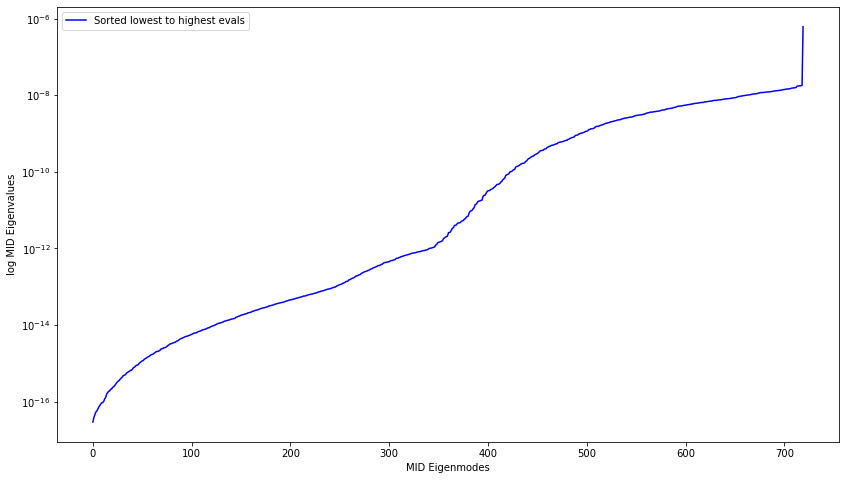

In [20]:
evalsMID, evecsMID = np.linalg.eig(mat_MID)
sorted_evalsMID = np.sort(evalsMID)
sorted_indicesMID = np.argsort(evalsMID)
sorted_evecsMID = evecsMID[:, sorted_indicesMID]
fig = plt.figure(figsize=(14, 8))
#plt.pMIDt(evals, label='Unsorted from eigendecomposition')
plt.plot(sorted_evalsMID, label='Sorted lowest to highest evals',linewidth=1.5,color = 'blue')
plt.semilogy()
plt.xlabel('MID Eigenmodes')
plt.ylabel('log MID Eigenvalues')
plt.legend()
file_name =  figures_path + '/' + analysis_name + 'MID_eigenvalues' + '.pdf'
fig.savefig(file_name)

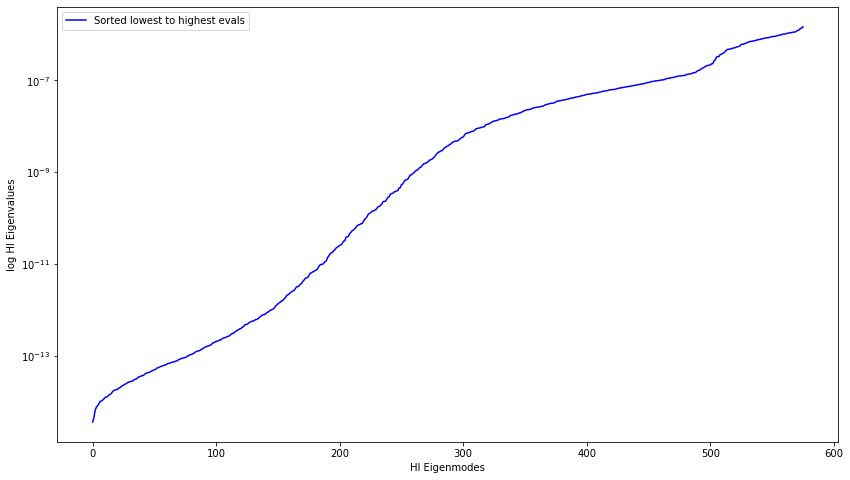

In [21]:
evalsHI, evecsHI = np.linalg.eig(mat_HI)
sorted_evalsHI = np.sort(evalsHI)
sorted_indicesHI = np.argsort(evalsHI)
sorted_evecsHI = evecsHI[:, sorted_indicesHI]
fig = plt.figure(figsize=(14, 8))
#plt.pHIt(evals, label='Unsorted from eigendecomposition')
plt.plot(sorted_evalsHI, label='Sorted lowest to highest evals',linewidth=1.5,color = 'blue')
plt.semilogy()
plt.xlabel('HI Eigenmodes')
plt.ylabel('log HI Eigenvalues')
plt.legend()
file_name = figures_path + '/' + analysis_name + 'HI_eigenvalues' + '.pdf'
fig.savefig(file_name)

In [22]:
c_target_log = CONFIG_PASTIS.getint('e2eparameters', 'c_target_log')
c_target = 10**(c_target_log)
n_repeat = CONFIG_PASTIS.getint('e2eparameters', 'n_repeat')
mu_mapLO = np.sqrt(
    ((c_target   ) / (n_LO-1)) / (np.diag(mat_LO)))
mu_mapMID = np.sqrt(
    ((c_target ) / (n_MID)) / (np.diag(mat_MID)))
mu_mapHI = np.sqrt(
    ((c_target ) / (n_HI)) / (np.diag(mat_HI)))


In [23]:
LO_modes = np.zeros(n_LO)
MID_modes = np.zeros(n_MID)
HI_modes = np.zeros(n_HI)
DM_modes = np.zeros(n_DM)

luvoir.zernike_mirror.actuators = LO_modes 
luvoir.sm.actuators = MID_modes
luvoir.ripple_mirror.actuators = HI_modes 
luvoir.dm.actuators = DM_modes


In [24]:
unaber_e_field, ref, inter = luvoir.calc_psf(ref=True, return_intermediate='efield')

In [26]:
all_contr_rand_seg1 = []
for rep in range(n_repeat):
    print('Segment realization {}/{}'.format(rep + 1, n_repeat))
    LO_modes = np.zeros(n_LO)
    MID_modes = np.zeros(n_MID)
    HI_modes = np.zeros(n_HI)
    DM_modes = np.zeros(n_DM)
    luvoir.zernike_mirror.actuators = LO_modes #c
    luvoir.sm.actuators = MID_modes
    luvoir.ripple_mirror.actuators = HI_modes #c
    luvoir.dm.actuators = DM_modes
    input_wf = luvoir.wf_aper
    LO_modes[1:n_LO] = np.random.normal(0,mu_mapLO*eunit,n_LO-1)
    luvoir.zernike_mirror.actuators  = LO_modes/2
    tmp_pupil = luvoir.zernike_mirror(input_wf)
    psf, ref, inter = luvoir.calc_psf(ref=True, return_intermediate='efield')
    dh_intensity = psf.intensity/norm * luvoir.dh_mask
    # calibrated_intensity = np.abs(psf.electric_field - unaber_e_field.electric_field)**2
    # dh_calibrated_intensity = calibrated_intensity/norm * dh_mask
    test_contrast1 = np.mean(dh_intensity[np.where(dh_intensity != 0)]) - contrast_floor
    all_contr_rand_seg1.append(test_contrast1)
    print('contrast:', test_contrast1)

Segment realization 1/20
contrast: 1.9844722260506535e-11
Segment realization 2/20
contrast: 5.7681082908002975e-12
Segment realization 3/20
contrast: 1.3289547423339305e-11
Segment realization 4/20
contrast: 1.1269350705259641e-11
Segment realization 5/20
contrast: 2.43718330634435e-11
Segment realization 6/20
contrast: 1.4047676498247177e-11
Segment realization 7/20
contrast: 4.8973980614125004e-12
Segment realization 8/20
contrast: 4.454752663415878e-12
Segment realization 9/20
contrast: 1.3453906305407117e-11
Segment realization 10/20
contrast: 1.260401466794274e-11
Segment realization 11/20
contrast: 7.35840511881469e-12
Segment realization 12/20
contrast: 1.0318443400343173e-11
Segment realization 13/20
contrast: 1.0308864158593114e-11
Segment realization 14/20
contrast: 8.617106308058108e-12
Segment realization 15/20
contrast: 2.284182573029054e-12
Segment realization 16/20
contrast: 1.00928479396514e-11
Segment realization 17/20
contrast: 7.461788117512578e-12
Segment realizati

In [31]:
tmp_std = np.dot(mat_LO,np.diag(mu_mapLO)**2)
var = 2*np.dot(tmp_std,tmp_std)
std = np.sqrt(np.trace(var))
c_mean_exp = np.mean(all_contr_rand_seg1)
c_std_exp = np.std(all_contr_rand_seg1)
print(std)

4.39206686491452e-12


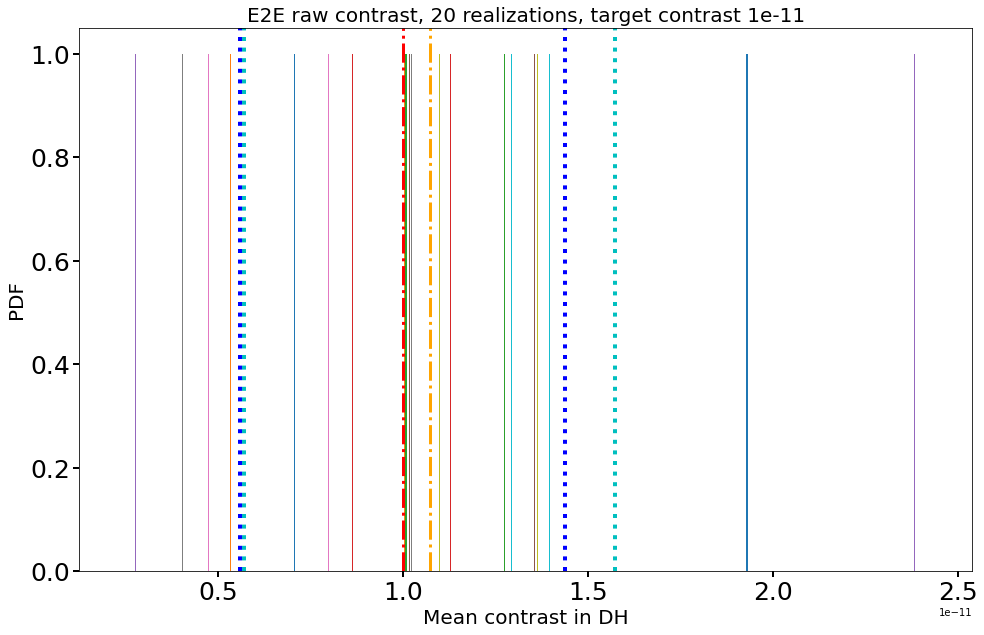

In [30]:
fig = plt.figure(figsize=(16, 10))
plt.hist(all_contr_rand_seg1,30)
plt.title('E2E raw contrast, {} realizations, target contrast 1e-11'.format(n_repeat), size=20)
plt.xlabel('Mean contrast in DH', size=20)
plt.ylabel('PDF', size=20)
plt.axvline(c_target, c='r', ls='-.', lw='3')
plt.axvline(c_target + std, c='b', ls=':', lw=4)
plt.axvline(c_target - std, c='b', ls=':', lw=4)
plt.axvline(c_mean_exp, c='orange', ls='-.', lw='3')
plt.axvline(c_mean_exp + c_std_exp, c='c', ls=':', lw=4)
plt.axvline(c_mean_exp - c_std_exp, c='c', ls=':', lw=4)
plt.tick_params(axis='both', which='both', length=6, width=2, labelsize=25)
file_name = figures_path + '/' + analysis_name + '_LO_e2e_histogram' + '.pdf'
fig.savefig(file_name)

In [32]:
all_contr_rand_seg1 = []
for rep in range(n_repeat):
    print('Segment realization {}/{}'.format(rep + 1, n_repeat))
    LO_modes = np.zeros(n_LO)
    MID_modes = np.zeros(n_MID)
    HI_modes = np.zeros(n_HI)
    DM_modes = np.zeros(n_DM)
    luvoir.zernike_mirror.actuators = LO_modes #c
    luvoir.sm.actuators = MID_modes
    luvoir.ripple_mirror.actuators = HI_modes #c
    luvoir.dm.actuators = DM_modes
    input_wf = luvoir.wf_aper
    MID_modes = np.random.normal(0,mu_mapMID*eunit,n_MID)
    luvoir.sm.actuators  = MID_modes/2
    tmp_pupil = luvoir.zernike_mirror(input_wf)
    psf, ref, inter = luvoir.calc_psf(ref=True, return_intermediate='efield')
    dh_intensity = psf.intensity/norm * luvoir.dh_mask
    calibrated_intensity = np.abs(psf.electric_field - unaber_e_field.electric_field)**2
    dh_calibrated_intensity = calibrated_intensity/norm * luvoir.dh_mask
    test_contrast1 = np.mean(dh_intensity[np.where(dh_intensity != 0)]) - contrast_floor
    all_contr_rand_seg1.append(test_contrast1)
    print('contrast:', test_contrast1)


Segment realization 1/20
contrast: 4.913923005531611e-12
Segment realization 2/20
contrast: 5.883952752032879e-12
Segment realization 3/20
contrast: 5.755852291553505e-12
Segment realization 4/20
contrast: 5.354193877837984e-12
Segment realization 5/20
contrast: 5.572219844418806e-12
Segment realization 6/20
contrast: 4.743141488905778e-12
Segment realization 7/20
contrast: 5.204066708024373e-12
Segment realization 8/20
contrast: 6.47389022003166e-12
Segment realization 9/20
contrast: 6.407204597015916e-12
Segment realization 10/20
contrast: 6.178920014282826e-12
Segment realization 11/20
contrast: 6.19472449676079e-12
Segment realization 12/20
contrast: 5.735437075403342e-12
Segment realization 13/20
contrast: 5.2186988033062224e-12
Segment realization 14/20
contrast: 5.886644605359097e-12
Segment realization 15/20
contrast: 5.912969440994196e-12
Segment realization 16/20
contrast: 5.660440684022724e-12
Segment realization 17/20
contrast: 6.566531875291263e-12
Segment realization 18/2

6.330320227354982e-12


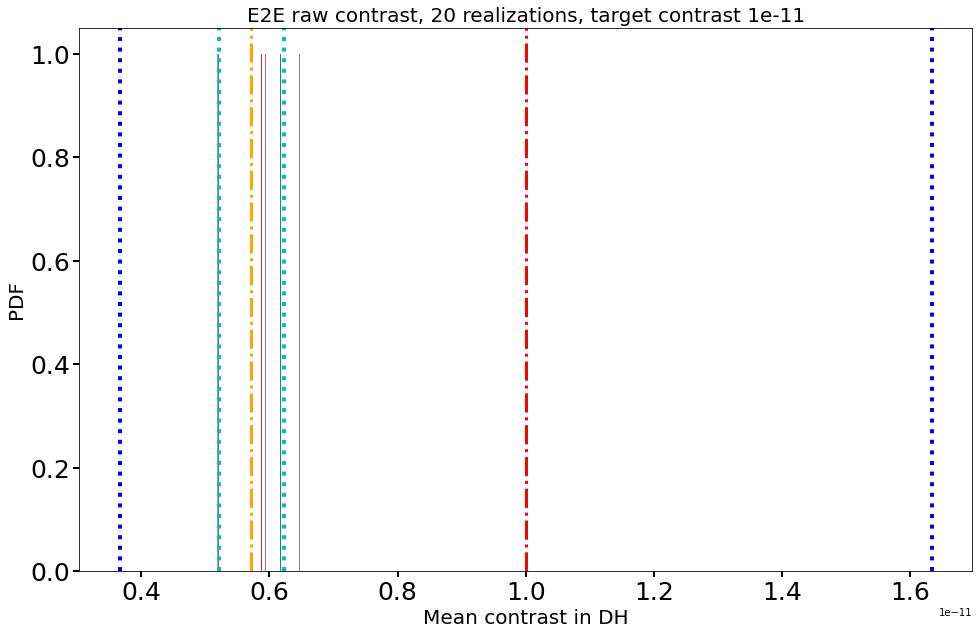

In [33]:
tmp_std = np.dot(mat_MID,np.diag(mu_mapMID)**2)
var = 2*np.dot(tmp_std,tmp_std)
std = np.sqrt(np.trace(var))
c_mean_exp = np.mean(all_contr_rand_seg1)
c_std_exp = np.std(all_contr_rand_seg1)
print(std)
fig = plt.figure(figsize=(16, 10))
plt.hist(all_contr_rand_seg1,30)
plt.title('E2E raw contrast, {} realizations, target contrast 1e-11'.format(n_repeat), size=20)
plt.xlabel('Mean contrast in DH', size=20)
plt.ylabel('PDF', size=20)
plt.axvline(c_target, c='r', ls='-.', lw='3')
plt.axvline(c_target + std, c='b', ls=':', lw=4)
plt.axvline(c_target - std, c='b', ls=':', lw=4)
plt.axvline(c_mean_exp, c='orange', ls='-.', lw='3')
plt.axvline(c_mean_exp + c_std_exp, c='c', ls=':', lw=4)
plt.axvline(c_mean_exp - c_std_exp, c='c', ls=':', lw=4)
plt.tick_params(axis='both', which='both', length=6, width=2, labelsize=25)
file_name = figures_path + '/' + analysis_name + '_MID_e2e_histogram' + '.pdf'
fig.savefig(file_name)

In [34]:
N_zernike = max_MID
zernike_coeffs_numaps = np.zeros([N_zernike,n_MID])
for qq in range(N_zernike):
    zernike_coeffs_tmp = np.zeros([n_MID])
    for pp in range(120):
        zernike_coeffs_tmp[qq+(pp)*N_zernike] = mu_mapMID[qq+(pp)*N_zernike]
    zernike_coeffs_numaps[qq] = zernike_coeffs_tmp
zernike_coeffs_table = np.zeros([N_zernike,120])
for qq in range(N_zernike):
    zernike_coeffs_tmp = np.zeros([120])
    for pp in range(120):
        zernike_coeffs_table[qq,pp] = mu_mapMID[qq+(pp)*N_zernike]
nu_maps = []
for qq in range(N_zernike):
    zernike_coeffs = eunit*zernike_coeffs_numaps[qq]/2
    luvoir.sm.actuators = zernike_coeffs*10**(12)
    nu_maps.append(luvoir.sm.surface)

0
1
2
3
4
5


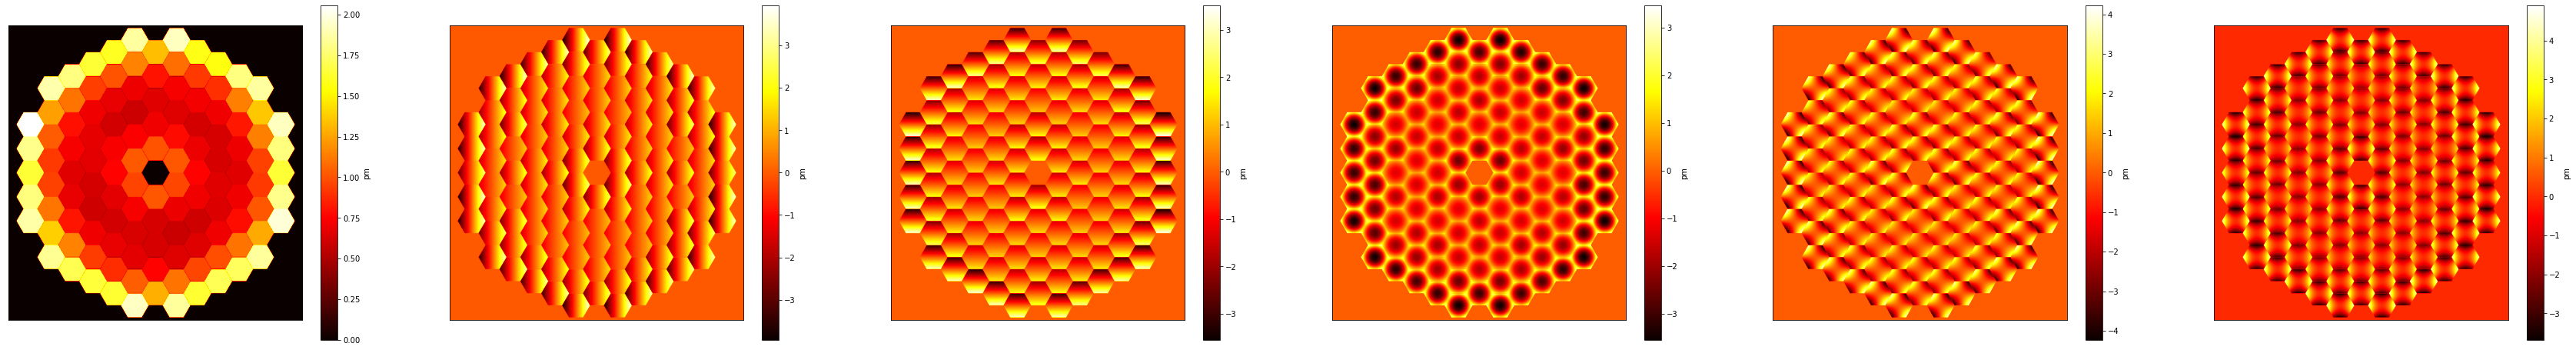

In [35]:
if len(nu_maps) ==1:
    fig, axs = plt.subplots(1, len(nu_maps), figsize=(60, 20))
    phaseplot = axs.imshow(np.reshape(nu_maps[0], [npup, npup]), cmap='hot')
    axs.axes.get_xaxis().set_visible(False)
    axs.axes.get_yaxis().set_visible(False)
    clb = fig.colorbar(phaseplot, ax=axs, shrink=0.4)
    clb.set_label('pm', rotation=90)

else:
    fig, axs = plt.subplots(1,len(nu_maps),figsize=(60,20))
    for qq in range(0,len(nu_maps)):
        print(qq)
        phaseplot = axs[qq].imshow(np.reshape(nu_maps[qq],[npup,npup]),cmap = 'hot')
        axs[qq].axes.get_xaxis().set_visible(False)
        axs[qq].axes.get_yaxis().set_visible(False)
        clb=  fig.colorbar(phaseplot,ax = axs[qq],shrink=0.4)
        clb.set_label('pm', rotation=90)

plt.show()
file_name = figures_path + '/' + analysis_name + '_MID_NU_Maps' + '.pdf'
fig.savefig(file_name)

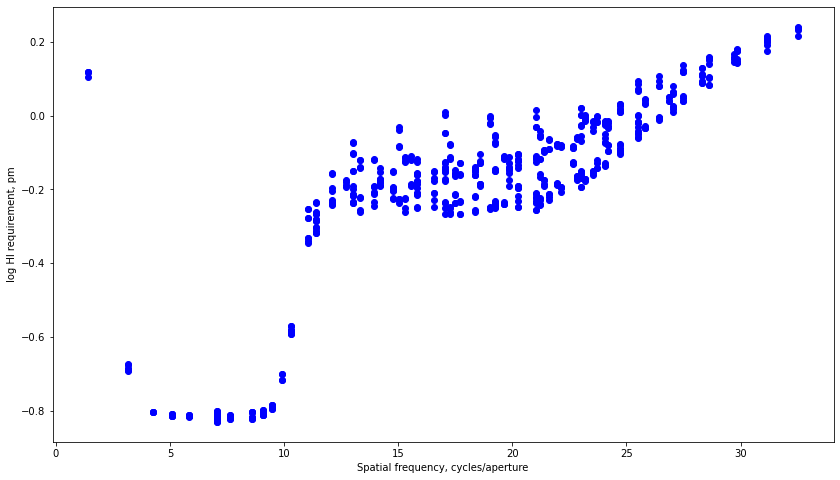

In [36]:
fourier_grid = hc.make_pupil_grid(dims=max_HI, diameter=max_HI)
rho0 = 2*np.sqrt(fourier_grid.x**2+fourier_grid.y**2)
rho = np.sort(rho0)

fig = plt.figure(figsize=(14, 8))
plt.plot(rho,np.log10(mu_mapHI*1000),'bo')
plt.xlabel('Spatial frequency, cycles/aperture')
plt.ylabel('log HI requirement, pm')
file_name = figures_path + '/' + analysis_name + '_HI_NU_Maps' + '.pdf'
fig.savefig(file_name)


In [37]:
# Making tables
# For LO modes

ZernikeList = []
for pp in range(0,n_LO-1):
    ZernikeList.append('Global Z' + np.str(pp +1));
table_LO = astropy.table.Table()
LO_Values_col = astropy.table.Table.Column(
        name = '$\Delta \epsilon_{11}^{LO}$ (nm)',
        data = mu_mapLO, dtype = float, format="7.2f")
LO_Labels_col = astropy.table.Table.Column(
        name = 'LO Modes', data = ZernikeList, dtype = str)
table_LO.add_column(LO_Labels_col)
table_LO.add_column(LO_Values_col)

filename = figures_path + '/' + 'Table_LO_w11.csv'
table_LO.write(filename, format='csv',overwrite=True)
filename = figures_path + '/' +  'Table_LO_w11.tex'
table_LO.write(filename, format='latex',overwrite=True)

In [38]:
# For MID mode

zernike_coeffs_numaps_max = np.zeros(max_MID)
for pp in range(0,max_MID):
    zernike_coeffs_numaps_max[pp] = np.max(zernike_coeffs_table[pp,:])*1000/2
zernike_coeffs_numaps_min = np.zeros(max_MID)
for pp in range(0,max_MID):
    zernike_coeffs_numaps_min[pp] = np.min(zernike_coeffs_table[pp,:])*1000/2
zernike_coeffs_numaps_median = np.zeros(max_MID)
for pp in range(0,max_MID):
    zernike_coeffs_numaps_median[pp] = np.median(zernike_coeffs_table[pp,:])*1000/2

In [39]:
ZernikeList = []
for pp in range(0,max_MID):
    ZernikeList.append('Segment Z' + np.str(pp));

table_MID = astropy.table.Table()
MID_Max_Values_col = astropy.table.Table.Column(
        name = 'max $ \Delta \epsilon_{11}^{MID}$ (pm)',
        data = zernike_coeffs_numaps_max, dtype = float, format="7.1f")
MID_Min_Values_col = astropy.table.Table.Column(
        name = 'min$ \Delta \epsilon_{11}^{MID}$ (pm)',
        data = zernike_coeffs_numaps_min, dtype = float, format="7.1f")
MID_Median_Values_col = astropy.table.Table.Column(
        name = 'median$ \Delta \epsilon_{11}^{MID}$ (pm)',
        data = zernike_coeffs_numaps_median, dtype = float, format="7.2f")
MID_Labels_col = astropy.table.Table.Column(
        name = 'MID Modes', data = ZernikeList, dtype = str)
table_MID.add_column(MID_Labels_col)
table_MID.add_column(MID_Max_Values_col)
table_MID.add_column(MID_Min_Values_col)
table_MID.add_column(MID_Median_Values_col)

In [40]:
filename = figures_path + '/' + 'Table_MID_w11.csv'
table_MID.write(filename, format='csv',overwrite=True)
filename = figures_path + '/' + 'Table_MID_w11.tex'
table_MID.write(filename, format='latex',overwrite=True)

In [41]:
# For HI modes


ZernikeList = []
for pp in range(0,n_LO-1):
    ZernikeList.append('Global Z' + np.str(pp +1));
table_LO = astropy.table.Table()
LO_Values_col = astropy.table.Table.Column(
        name = '$\Delta \epsilon_{11}^{LO}$ (nm)',
        data = mu_mapLO, dtype = float, format="7.2f")
LO_Labels_col = astropy.table.Table.Column(
        name = 'LO Modes', data = ZernikeList, dtype = str)
table_LO.add_column(LO_Labels_col)
table_LO.add_column(LO_Values_col)

filename = figures_path + '/' + 'Table_LO_w11.csv'
table_LO.write(filename, format='csv',overwrite=True)
filename = figures_path + '/' + 'Table_LO_w11.tex'
table_LO.write(filename, format='latex',overwrite=True)

SFList = ['Inside DH','Oustide DH']


In [42]:
where_core = rho < luvoir.apod_dict[coronagraph_design]['iwa'] /2
where_dh = (rho > luvoir.apod_dict[coronagraph_design]['iwa']  )& (rho <  luvoir.apod_dict[coronagraph_design]['owa'] )
where_outside_dh = (rho >  luvoir.apod_dict[coronagraph_design]['owa'])

In [43]:
SFList = ['Inside DH','Oustide DH']
SFreq = [np.mean(mu_mapHI[where_dh])*1000,np.mean(mu_mapHI[where_outside_dh])*1000]
table_HI = astropy.table.Table()
HI_Values_col = astropy.table.Table.Column(
        name = ' $ \Delta \epsilon_{11}^{HI}$ (pm)',
        data = SFreq, dtype = float, format="7.2f")
HI_Labels_col = astropy.table.Table.Column(
        name = 'MID Modes', data = SFList, dtype = str)
table_HI.add_column(HI_Labels_col)
table_HI.add_column(HI_Values_col)

filename = figures_path + '/' + 'Table_HI_w11.csv'
table_HI.write(filename, format='csv',overwrite=True)
filename = figures_path + '/' + 'Table_HI_w11.tex'
table_HI.write(filename, format='latex',overwrite=True)


In [44]:
nimg = np.int(np.sqrt(luvoir.focal_det.x.shape))

In [45]:
poked_modes = [1,3,4,7,9]
n_pokes = len(poked_modes)
phases = np.zeros([len(poked_modes),npup,npup])
detectors = np.zeros([len(poked_modes),nimg,nimg])

for pp in range(0,n_pokes):
    LO_modes = np.zeros(n_LO)
    MID_modes = np.zeros(n_MID)
    HI_modes = np.zeros(n_HI)
    DM_modes = np.zeros(n_DM)
    LO_modes[poked_modes[pp]] = eunit/2*100
    luvoir.zernike_mirror.actuators = LO_modes #c
    luvoir.sm.actuators = MID_modes
    luvoir.ripple_mirror.actuators = HI_modes #c
    luvoir.dm.actuators = DM_modes
    tmp_surface_poke = luvoir.zernike_mirror.surface
    tmp_psf_poke, ref, = luvoir.calc_psf(ref=True, display_intermediate=False, return_intermediate=None)
    phases[pp] = np.reshape(tmp_surface_poke*luvoir.aperture,[npup,npup])
    detectors[pp] = np.reshape(tmp_psf_poke,[nimg,nimg])
    



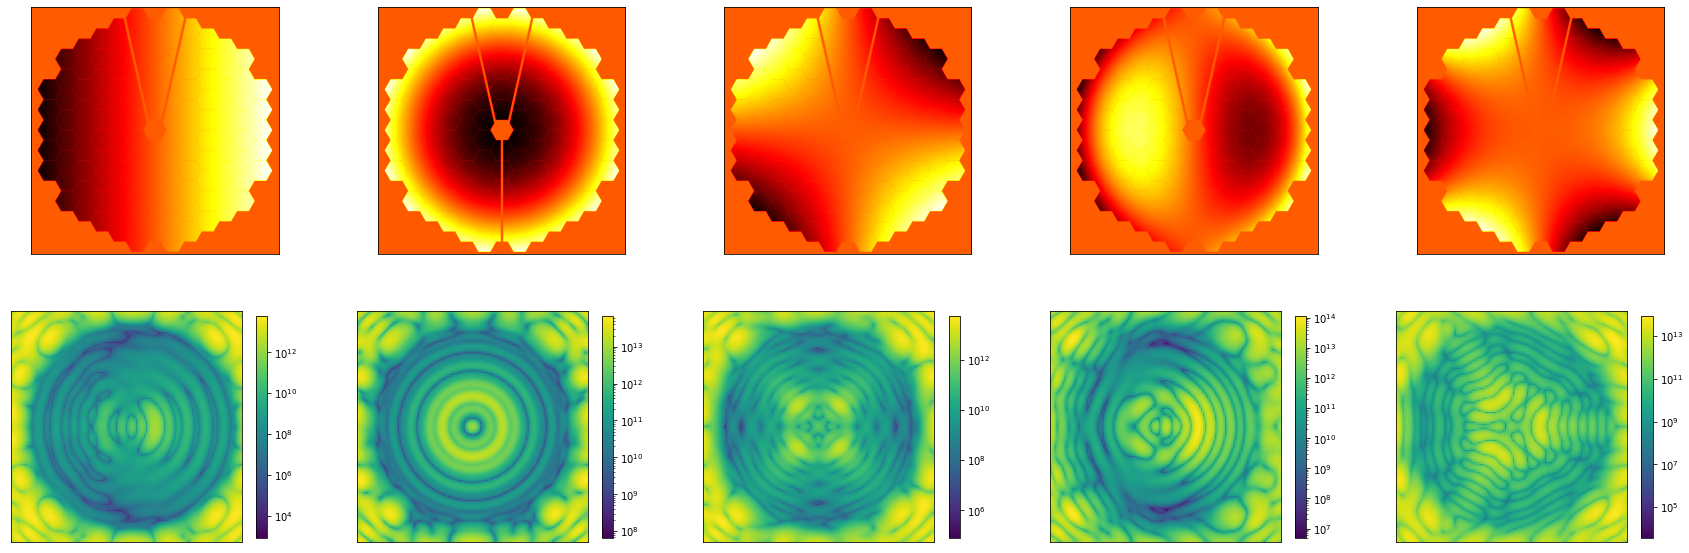

In [46]:
fig, axs = plt.subplots(2, n_pokes,figsize=(30,10))
for qq in range(0,n_pokes):
    phaseplot = axs[0,qq].imshow(phases[qq],cmap = 'hot')
    axs[0,qq].axes.get_xaxis().set_visible(False)
    axs[0,qq].axes.get_yaxis().set_visible(False)
    #psfplot =  axs[1,qq].imshow(detectors[qq],norm=LogNorm(),vmin=10**(-11), vmax=10**(-5),cmap = 'hot')
    psfplot =  axs[1,qq].imshow(detectors[qq],norm=LogNorm())
    fig.colorbar(psfplot,ax = axs[1,qq],shrink=0.9)
    axs[1,qq].axes.get_xaxis().set_visible(False)
    axs[1,qq].axes.get_yaxis().set_visible(False)
plt.show()

In [47]:
file_name = figures_path + '/' + analysis_name + '_Poked_LO_camera' + '.pdf'
fig.savefig(file_name)

In [48]:
LO_modes = np.zeros(n_LO)
MID_modes = np.zeros(n_MID)
HI_modes = np.zeros(n_HI)
DM_modes = np.zeros(n_DM)


luvoir.zernike_mirror.actuators = LO_modes #c
luvoir.sm.actuators = MID_modes
luvoir.ripple_mirror.actuators = HI_modes #c
luvoir.dm.actuators = DM_modes

In [49]:
zernike_ref = luvoir.calc_low_order_wfs()
poked_modes = [1,3,4,7,9]
n_pokes = len(poked_modes)
phases = np.zeros([len(poked_modes),npup,npup])
detectors = np.zeros([len(poked_modes),npup,npup])

In [50]:
for pp in range(0,n_pokes):
    LO_modes = np.zeros(n_LO)
    MID_modes = np.zeros(n_MID)
    HI_modes = np.zeros(n_HI)
    DM_modes = np.zeros(n_DM)
    LO_modes[poked_modes[pp]] = eunit/2*100
    luvoir.zernike_mirror.actuators = LO_modes #c
    luvoir.sm.actuators = MID_modes
    luvoir.ripple_mirror.actuators = HI_modes #c
    luvoir.dm.actuators = DM_modes  
    tmp_surface_poke = luvoir.zernike_mirror.surface
    tmp_psf_poke = luvoir.calc_low_order_wfs()
    phases[pp] = np.reshape(tmp_surface_poke*luvoir.aperture,[npup,npup])
    detectors[pp] = np.reshape(tmp_psf_poke.power - zernike_ref.power,[npup,npup])

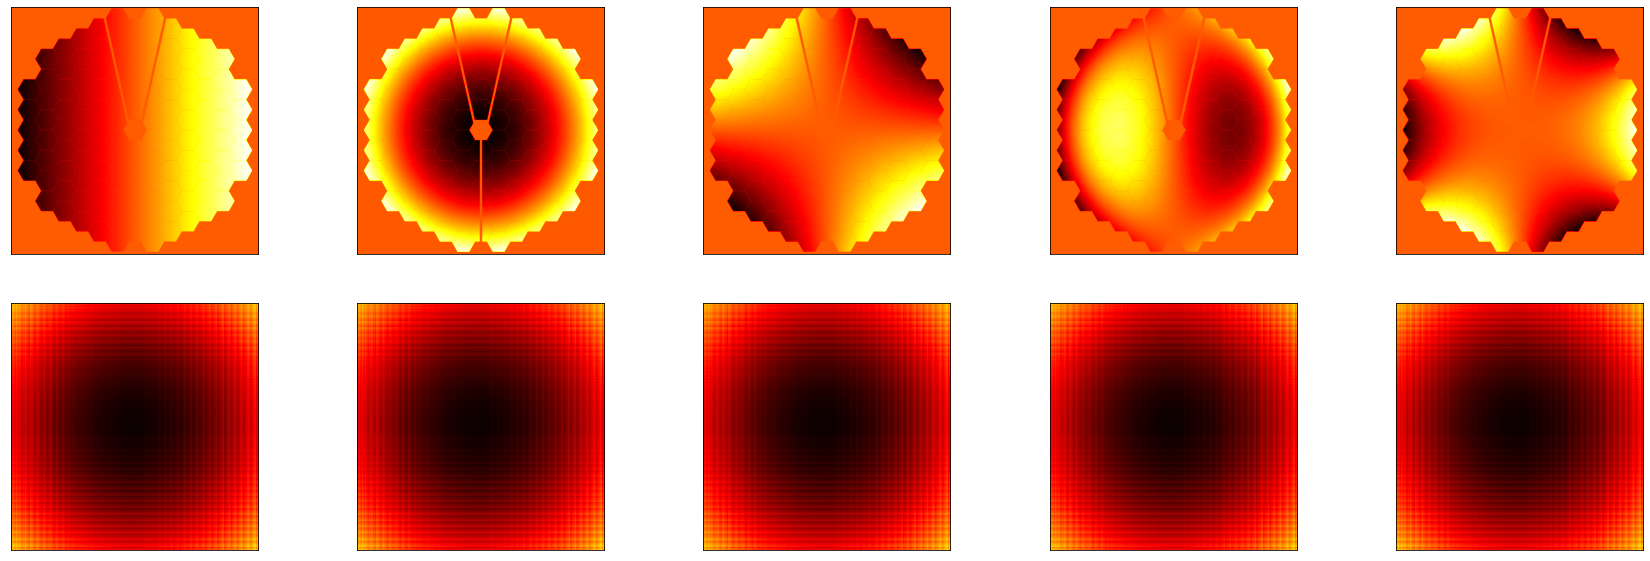

In [51]:
fig, axs = plt.subplots(2, n_pokes,figsize=(30,10))
for qq in range(0,n_pokes):
    phaseplot = axs[0,qq].imshow(phases[qq],cmap = 'hot')
    axs[0,qq].axes.get_xaxis().set_visible(False)
    axs[0,qq].axes.get_yaxis().set_visible(False)
    psfplot =  axs[1,qq].imshow(detectors[qq],cmap = 'hot')
#     fig.colorbar(psfplot,ax = axs[1,qq],shrink=0.9)
    axs[1,qq].axes.get_xaxis().set_visible(False)
    axs[1,qq].axes.get_yaxis().set_visible(False)
plt.show()

file_name = figures_path + '/' + analysis_name + '_Poked_LO_LOWFS' + '.pdf'
fig.savefig(file_name)

In [52]:
poked_modes = [0,1,3,4,5]
n_pokes = len(poked_modes)
phases = np.zeros([len(poked_modes),npup,npup])
detectors = np.zeros([len(poked_modes),nimg,nimg])

/opt/miniconda3/envs/pastis_global/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


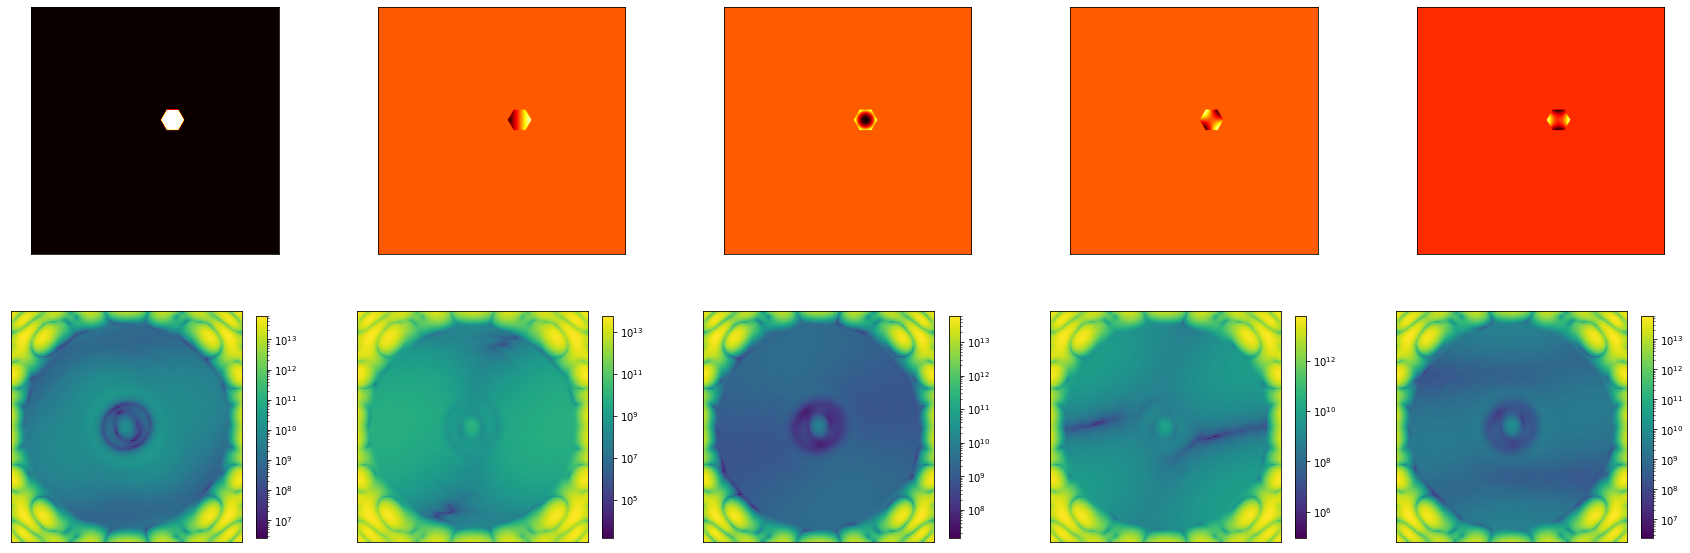

In [53]:
for pp in range(0,n_pokes):
    LO_modes = np.zeros(n_LO)
    MID_modes = np.zeros(n_MID)
    HI_modes = np.zeros(n_HI)
    DM_modes = np.zeros(n_DM)
    MID_modes[poked_modes[pp]] = eunit/2*10
    luvoir.zernike_mirror.actuators = LO_modes #c
    luvoir.sm.actuators = MID_modes
    luvoir.ripple_mirror.actuators = HI_modes #c
    luvoir.dm.actuators = DM_modes 
    tmp_surface_poke = luvoir.sm.surface
    tmp_psf_poke, ref, = luvoir.calc_psf(ref=True, display_intermediate=False, return_intermediate=None)
    phases[pp] = np.reshape(tmp_surface_poke,[npup,npup])
    detectors[pp] = np.reshape(tmp_psf_poke,[nimg,nimg])
fig, axs = plt.subplots(2, n_pokes,figsize=(30,10))
for qq in range(0,n_pokes):
    phaseplot = axs[0,qq].imshow(phases[qq],cmap = 'hot')
    axs[0,qq].axes.get_xaxis().set_visible(False)
    axs[0,qq].axes.get_yaxis().set_visible(False)
    psfplot =  axs[1,qq].imshow(detectors[qq],norm=LogNorm())
    fig.colorbar(psfplot,ax = axs[1,qq],shrink=0.9,cmap = 'hot')
    axs[1,qq].axes.get_xaxis().set_visible(False)
    axs[1,qq].axes.get_yaxis().set_visible(False)
plt.show()

file_name = figures_path + '/' + analysis_name + '_Poked_MID_camera' + '.pdf'
fig.savefig(file_name)


In [54]:
LO_modes = np.zeros(n_LO)
MID_modes = np.zeros(n_MID)
HI_modes = np.zeros(n_HI)
DM_modes = np.zeros(n_DM)

luvoir.zernike_mirror.actuators = LO_modes #c
luvoir.sm.actuators = MID_modes
luvoir.ripple_mirror.actuators = HI_modes #c
luvoir.dm.actuators = DM_modes 

zernike_ref = luvoir.calc_out_of_band_wfs()

poked_modes = [1,3,4,7,9]
n_pokes = len(poked_modes)
phases = np.zeros([len(poked_modes),npup,npup])
detectors = np.zeros([len(poked_modes),npup,npup])

In [55]:
detectors.shape

(5, 1000, 1000)

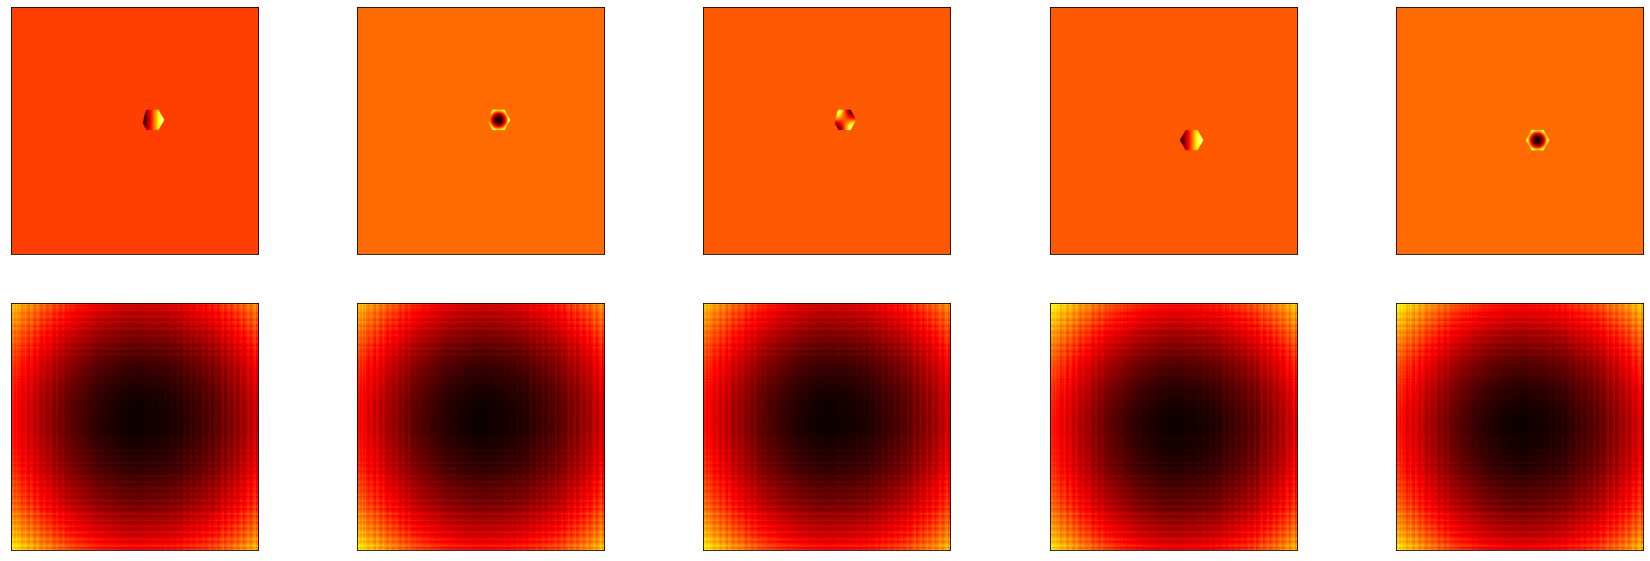

In [56]:
for pp in range(0,n_pokes):
    LO_modes = np.zeros(n_LO)
    MID_modes = np.zeros(n_MID)
    HI_modes = np.zeros(n_HI)
    DM_modes = np.zeros(n_DM)
    MID_modes[poked_modes[pp]] = eunit/2*100
    luvoir.zernike_mirror.actuators = LO_modes
    luvoir.sm.actuators = MID_modes
    luvoir.ripple_mirror.actuators = HI_modes
    luvoir.dm.actuators = DM_modes
    tmp_surface_poke = luvoir.sm.surface
    tmp_psf_poke = luvoir.calc_out_of_band_wfs()
    phases[pp] = np.reshape(tmp_surface_poke*luvoir.aperture,[npup,npup])
    detectors[pp] = np.reshape(tmp_psf_poke.power - zernike_ref.power,[npup,npup])
fig, axs = plt.subplots(2, n_pokes,figsize=(30,10))
for qq in range(0,n_pokes):
    phaseplot = axs[0,qq].imshow(phases[qq],cmap = 'hot')
    axs[0,qq].axes.get_xaxis().set_visible(False)
    axs[0,qq].axes.get_yaxis().set_visible(False)
    psfplot =  axs[1,qq].imshow(detectors[qq],cmap = 'hot')
#     fig.colorbar(psfplot,ax = axs[1,qq],shrink=0.9)
    axs[1,qq].axes.get_xaxis().set_visible(False)
    axs[1,qq].axes.get_yaxis().set_visible(False)
plt.show()

file_name = figures_path + '/' + analysis_name + '_Poked_MID_MIDWFS' + '.pdf'
fig.savefig(file_name)

In [57]:
poked_modes = [0,1,5,10,14]
n_pokes = len(poked_modes)
phases = np.zeros([len(poked_modes),npup,npup])
detectors = np.zeros([len(poked_modes),nimg,nimg])

In [58]:
for pp in range(0,n_pokes):
    LO_modes = np.zeros(n_LO)
    MID_modes = np.zeros(n_MID)
    HI_modes = np.zeros(n_HI)
    DM_modes = np.zeros(n_DM)
    HI_modes[poked_modes[pp]] = eunit/2*10
    luvoir.zernike_mirror.actuators = LO_modes
    luvoir.sm.actuators = MID_modes
    luvoir.ripple_mirror.actuators = HI_modes
    luvoir.dm.actuators = DM_modes
    tmp_surface_poke = luvoir.ripple_mirror.surface
    tmp_psf_poke, ref, = luvoir.calc_psf(ref=True, display_intermediate=False, return_intermediate=None)
    phases[pp] = np.reshape(tmp_surface_poke*luvoir.aperture,[npup,npup])
    detectors[pp] = np.reshape(tmp_psf_poke,[nimg,nimg])

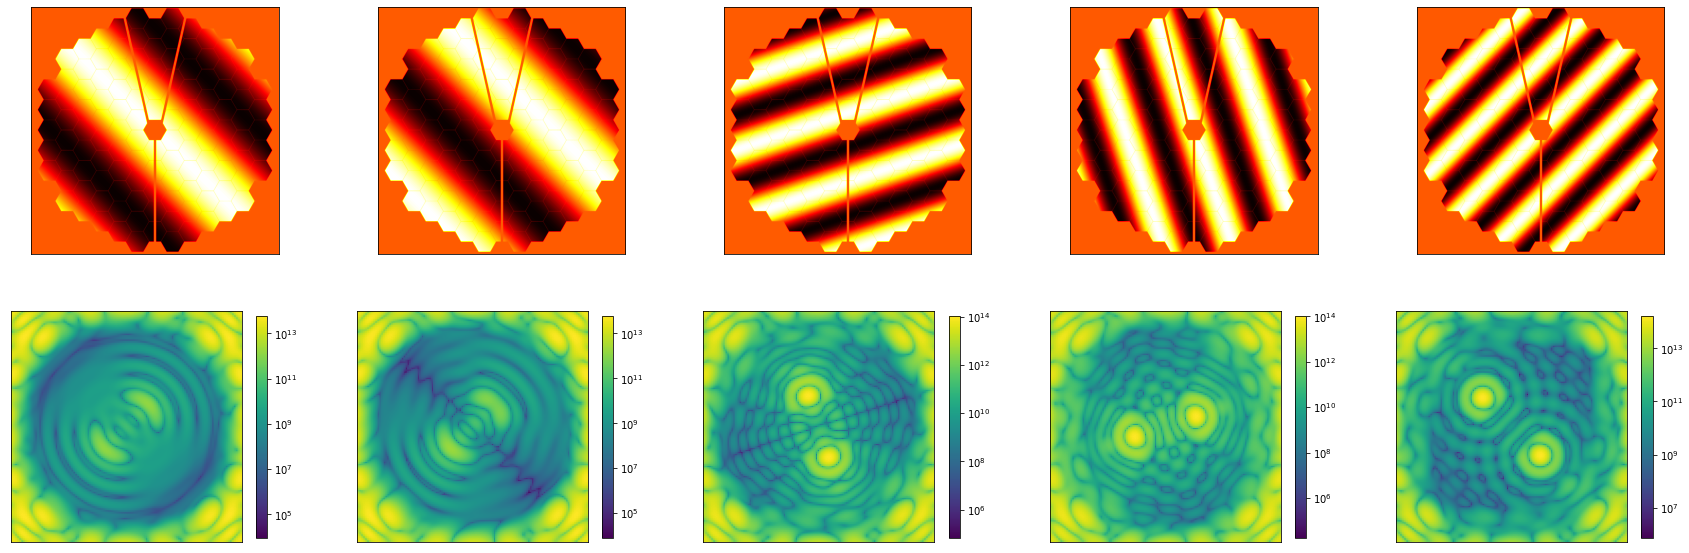

In [59]:
fig, axs = plt.subplots(2, n_pokes,figsize=(30,10))
for qq in range(0,n_pokes):
    phaseplot = axs[0,qq].imshow(phases[qq],cmap = 'hot')
    axs[0,qq].axes.get_xaxis().set_visible(False)
    axs[0,qq].axes.get_yaxis().set_visible(False)
    psfplot =  axs[1,qq].imshow(detectors[qq],norm=LogNorm())
    fig.colorbar(psfplot,ax = axs[1,qq],shrink=0.9)
    axs[1,qq].axes.get_xaxis().set_visible(False)
    axs[1,qq].axes.get_yaxis().set_visible(False)
plt.show()


file_name = figures_path + '/' + analysis_name + '_Poked_HI_Camera' + '.pdf'
fig.savefig(file_name)